## 様々な物体検出手法１

### 基本コード
順番に実行して演習の準備，カメラの動作確認を行う．

In [87]:
## メディア演習1 画像情報処理　0 まずは説明
## 画像のカメラからの取り込みとそのコピー
## まずはこれをよく理解すること

import numpy as np
import cv2
import matplotlib.pyplot as plt
import IPython
import time

In [88]:
# カメラオープン
#cap = cv2.VideoCapture(2)

# カメラを使えない場合はこちら
# 自動ループしないので，ビデオが終了したあとはこのセルを再実行すること
cap = cv2.VideoCapture("fukei.mp4")

In [89]:
## 結果・入力画像表示用の関数
## 必要に応じて書き換え
## 今回は基本的には書き換える必要はない

def update_disp(disp,image):
    _, enc = cv2.imencode(".jpg",image)
    disp.update(IPython.display.Image(data=enc.tobytes()))

## 何も表示しないためのプロセス
def zero(src, args=[]):
    return np.zeros(src.shape, dtype=np.uint8)

def image_show(process=zero, args=[]):
    ## 入力画像表示用ディスプレイ
    disp = IPython.display.display("Input",display_id=1)
    ## 結果画像表示用ディスプレイ
    disp2 = IPython.display.display("Result",display_id = 2)
    while cap.isOpened():
        try:
            ret, frame = cap.read()
            if ret is False:
                break
            # 入力画像と結果画像の表示を更新
            update_disp(disp,frame)
            update_disp(disp2, process(frame, args))
            time.sleep(1.0/30)

        except KeyboardInterrupt:
            break

## BGR を RGBに変換して表示
def imshow(plt, img):
    plt.imshow(img[:,:,::-1])

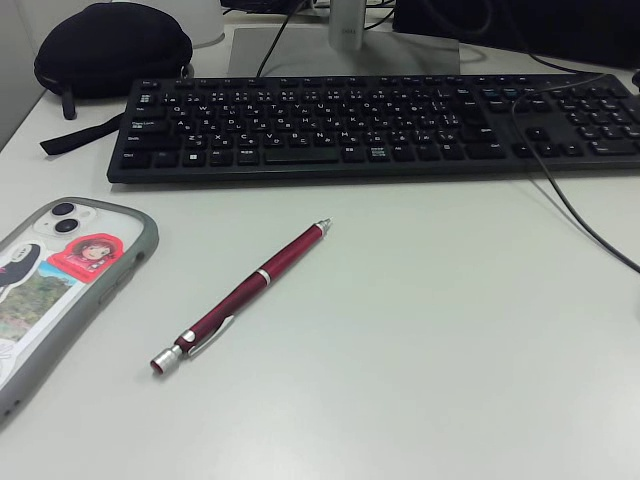

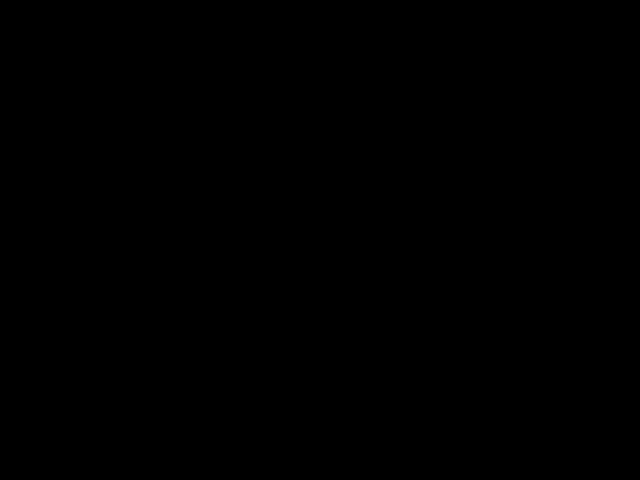

In [91]:
## 画像表示のテスト
## 動画が表示されていればOK
## 適切に表示されない場合は，カメラの接続を確認すること．
## うまく表示されない場合の対処方法は，資料参照

image_show()

## 結果画像を表示させる場合は以下のように使う
## image_show(process, args)
## このとき，process は以下の形式を取る
## process(img, args) で結果画像を return
## 必ず2つの引数を持たなければならない，引数が不要の場合は以下のように初期値を与える（与えられない時，自動的にそれになる）
## process(img , args = [])
## 2つ以上の場合は，配列などで与える
## process(img, [theta, s, t]
## など．
## 以下の例で試してみること

width = 640
height = 480
channels = 3


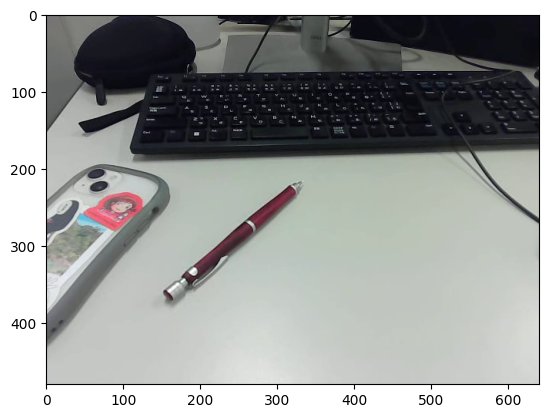

In [92]:
## 画像を１枚取り込んで表示する．
## ここまでは共通

## 画像は numpy 形式で保持される．
ret, src = cap.read()

## 画像の読み込みが成功した場合は ret に True が代入される．
if (ret == True):
    imshow(plt,src)
    ## 画像サイズ等の情報は，src.shape に記録されている
    ## numpy は行列（等）を保持する形式のため，[行（高さ），列（幅），チャネル数] の順番で保存される
    ## また，チャネル数とは画像がカラー画像の場合は3，グレースケール画像の場合は1となる．
    ## 詳しくは講義資料等を確認すること
    print("width = %d" % src.shape[1])
    print("height = %d" % src.shape[0])
    print("channels = %d" % src.shape[2])
    cv2.imwrite('before_conversion_8.jpg', src)
else:
    print("Image cannot be captured. Check camera connection")


準備終わり，以降，演習本体

### 色を用いた物体検出
演習資料の内容を確認し，色情報を利用した物体検出を実装せよ．

True

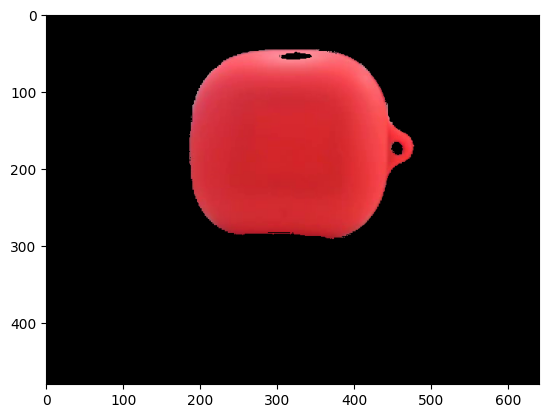

In [39]:
## 色情報に基づく物体検出を実装せよ．
## 判定結果については結果がわかりやすい画像となるように考えること（検出領域以外の明るさを減らす，適当に色をつけるなど）

#L2
def color_detection(src, args = []):
    ## 判定方法については資料に従っていくつかのものを試すこと
    dst = np.zeros(src.shape, dtype = np.uint8)
    target_rgb = [40, 45, 215]
    target = 120
    ## 適切なコードを記載
    for x in range(src.shape[1]):
        for y in range(src.shape[0]):
            b, g, r = src[y, x]
            db = int(b) - target_rgb[0]
            dg = int(g) - target_rgb[1]
            dr = int(r) - target_rgb[2]
            d = (db**2 + dg**2 + dr**2)**0.5
            if d > target:
                dst[y,x] = [0,0,0]
            else:
                dst[y,x] = src[y,x]

    return dst

# L1
def color_detection_l1(src, args = []):
    dst = np.zeros(src.shape, dtype = np.uint8)
    target_rgb = [40, 45, 215]
    target = 180
    for x in range(src.shape[1]):
        for y in range(src.shape[0]):
            b, g, r = src[y, x]
            db = abs(int(b) - target_rgb[0])
            dg = abs(int(g) - target_rgb[1])
            dr = abs(int(r) - target_rgb[2])
            d = db + dg + dr
            if d > target:
                dst[y,x] = [0,0,0]
            else:
                dst[y,x] = src[y,x]


    return dst

# rgb
def color_detection_rgb(src, args = []):
    dst = np.zeros(src.shape, dtype = np.uint8)
    r_range=(159, 255)
    g_range=(27, 140)
    b_range=(32,155)
    for x in range(src.shape[1]):
        for y in range(src.shape[0]):
            b, g, r = src[y, x]
            if r_range[0] <= r <= r_range[1] and g_range[0] <= g <= g_range[1] and b_range[0] <= b <= b_range[1]:
                dst[y, x] = src[y, x]
                continue


    return dst

# rgb削除
def color_detection_rgb_r(src, args = []):
    dst = np.zeros(src.shape, dtype = np.uint8)
    r_range=(159, 255)
    g_range=(27, 140)
    b_range=(32,155)
    for x in range(src.shape[1]):
        for y in range(src.shape[0]):
            b, g, r = src[y, x]
            if r_range[0] <= r <= r_range[1] and g_range[0] <= g <= g_range[1] and b_range[0] <= b <= b_range[1]:
                continue
            dst[y, x] = src[y, x]


    return dst

dst = color_detection_rgb(src)
imshow(plt, dst)
cv2.imwrite('rgb.jpg', dst)

In [ ]:
## 動画像で動作確認せよ



### 背景差分による物体検出
演習資料の内容を参考に，背景差分を用いて画像中の物体検出を行うコードを作成せよ
また，それを用いた実験により背景差分の特性について論じよ


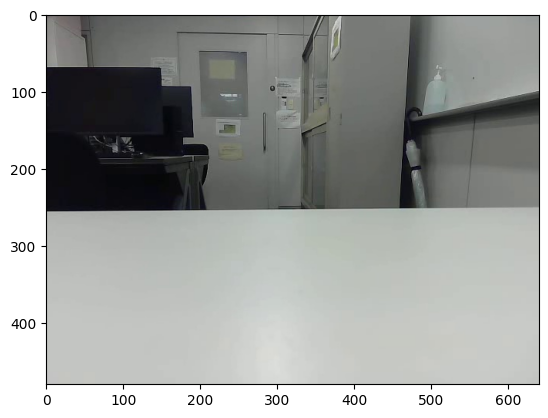

In [45]:
# 背景画像取得
# 撮り直したい場合は，再度実行すること
#ret, back = cap.read()
back = cv2.imread("before_conversion_7_behind.jpg")
imshow(plt, back)

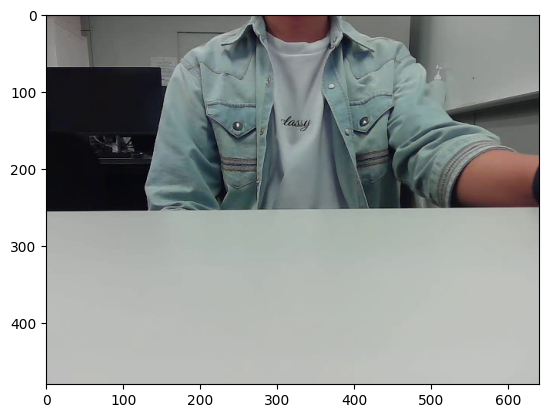

In [51]:
## 前景（入力）画像取得
## 背景画像取得時からカメラ等動かさないように注意

#ret,src = cap.read()
src = cv2.imread("before_conversion_7_body.jpg")
imshow(plt, src)

True

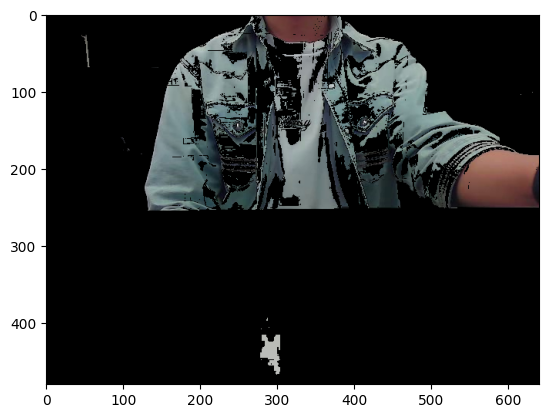

In [53]:
## 背景差分を実装せよ．


def back_subtraction(src, back):
    thresh = 30
    dst = np.zeros(src.shape, dtype = np.uint8)
    ## 適切なコードを記載
    diff = np.abs(src.astype(np.int16) - back.astype(np.int16))
    mask = np.any(diff > thresh, axis=2)
    dst[mask] = src[mask]

    return dst

dst = back_subtraction(src, back)
imshow(plt, dst)
cv2.imwrite('background-difference.jpg', dst)

In [ ]:
## 静止画だとわかりにくいので動画で確認すること


### フレーム間差分による物体検出
演習資料を参考に，フレーム間差分を用いた物体検出を実装せよ
また，その特性について論じよ．

True

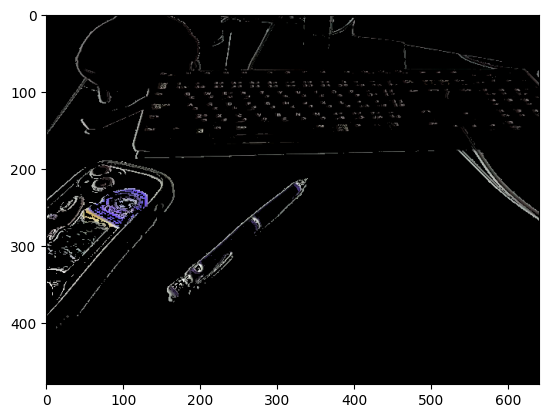

In [94]:
## フレーム間差分を実装せよ

def frame_diff(src1, src2):
    thresh = 20
    dst = np.zeros(src.shape, dtype = np.uint8)
    ## 適切なコードを記載
    diff = np.abs(src2.astype(np.int16) - src1.astype(np.int16))
    mask = np.any(diff > thresh, axis=2)
    dst[mask] = src2[mask]
    return dst

_, f1 = cap.read()
_, f2 = cap.read()
cv2.imwrite('frame-difference-b1.jpg', f1)
cv2.imwrite('frame-difference-b2.jpg', f2)
dst = frame_diff(f1, f2)
plt.imshow(dst)
cv2.imwrite('frame-difference.jpg', dst)

In [72]:
## 先細作成した関数を用いて，リアルタイム処理でのフレーム間差分を実装せよ．

def frame_diff_realtime():
    ## このあたりは基本，変更しなくてよい
    disp1 = IPython.display.display("Input", display_id = 1)
    disp2 = IPython.display.display("Diff", display_id = 2)
    ret, pre = cap.read()
    while cap.isOpened():
        try:
            ## 実際の記載はここから
            ## ここにフレーム間差分を実施する内容を記載せよ．必要に応じて関数等追加してもよい
            diff = np.abs(cur.astype(np.int16) - pre.astype(np.int16))
            mask = np.any(diff > thresh, axis=2)
            dst[mask] = cur[mask]
            ## 表示部分（以降，特に触らなくて良い）
            update_disp(disp1, src)
            update_disp(disp2, dst)
        except KeyboardInterrupt:
            break

frame_diff_realtime()


'Input'

'Diff'

NameError: name 'cur' is not defined